In [12]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from matplotlib.colors import NoNorm

In [13]:
def show_image(image, title="sample", figsize=(8,6), tickoff=False):
    plt.figure(figsize=figsize)
    if image.ndim == 2:
        plt.imshow(image, cmap="gray", norm=NoNorm())
    else:
        plt.imshow(image)
    plt.title(title)
    plt.show()

def show_double_image(image1,image2, title="Sample",figsize=(8,6)):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=figsize)
    fig.suptitle(title)
    ax1.imshow(image1,cmap="gray", norm=NoNorm())
    ax2.imshow(image2,cmap="gray", norm=NoNorm())

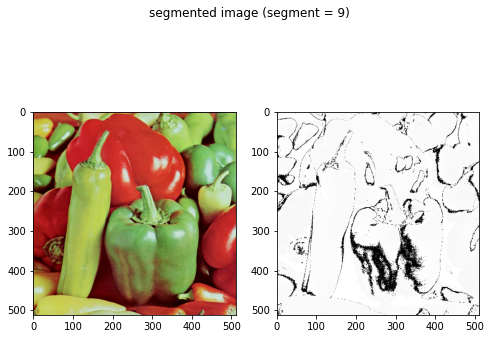

In [14]:
def kmeans(random_seed,n_clusters, points):
    """https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
    """
    rng = np.random.RandomState(random_seed)
    sample = rng.permutation(len(points))[: n_clusters]
    centers = points[sample]
    while True:
        labels = pairwise_distances_argmin(points, centers)
        new_centers = np.array(
            [points[labels == i].mean(0) for i in range(n_clusters)]
        )
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

def segment(img,number_segment,n_init=10,random_seed=0,):
    height = img.shape[0]
    width = img.shape[1]
    channels = 1 if len(img.shape) < 3 else img.shape[2]
    flat_img = img.reshape((height * width, channels))
    for init in range(n_init):
        clusters, centers = kmeans(random_seed,number_segment,flat_img)
    return clusters, centers


img = plt.imread("./images/peppers.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) / 255
centers, labels = segment(gray,9)
mask = (labels.reshape(*gray.shape) * 255).astype(np.uint8)
# remove noise
show_double_image(img,mask,'segmented image (segment = 9)')

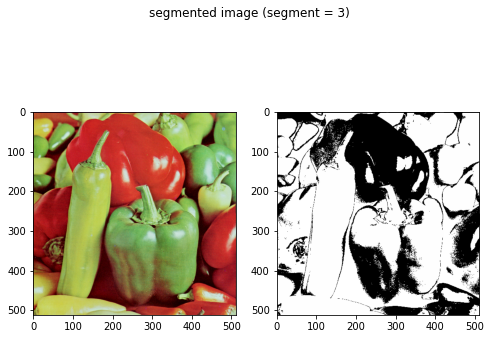

In [15]:
centers, labels = segment(gray,3)
mask = (labels.reshape(*gray.shape) * 255).astype(np.uint8)
# remove noise
show_double_image(img,mask,'segmented image (segment = 3)')